In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Read in file as pandas dataframe
df = pd.read_csv('results.csv')

# Remove first two rows
df = df.iloc[2:]

# Select columns of interest
df = df [['group', 'Q17', 'Q27', 'Q28', 'Q29','Q30']]

# Remove data with NaN values
df = df.dropna()

# # Rename group values
# df['group'] = df['group'].replace('1', 'Original')
# df['group'] = df['group'].replace('2', 'Chat-GPT')
# df['group'] = df['group'].replace('3', 'Proposed')


In [140]:

# Generate more test rows with varying values
np.random.seed(42)  # For reproducibility
n_new_rows = 50  # Number of new rows to generate

new_rows = []
for _ in range(n_new_rows):
    new_row = {
        "group": np.random.choice(['1', '2', '3']),  # Randomly assign to group 1, 2, or 3
        "Q17": np.random.randint(1, 6),  # Random score between 1 and 5
        # "Q27": np.random.randint(1, 6),
        "Q27": np.random.choice(["Yes", "No", "I'm not sure"]),
        "Q28": np.random.choice(["Yes", "No", "I'm not sure"]),  # Random yes/no
        "Q29": np.random.choice(["Yes", "No", "I'm not sure"]),  # Random yes/no/unsure
        "Q30": np.random.choice(["1 - Very little effort", "2 - Little effort", "3 - Neutral", "4 - Medium effort", "5 - A lot of effort"])
    }
    new_rows.append(new_row)

# Append new rows to the original DataFrame
df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

# Rename group values
df['group'] = df['group'].replace('1', 'Original')
df['group'] = df['group'].replace('2', 'Chat-GPT')
df['group'] = df['group'].replace('3', 'Proposed')

df['Q30'] = df['Q30'].replace('1 - Very little effort', '1')
df['Q30'] = df['Q30'].replace('2 - Little effort', '2')
df['Q30'] = df['Q30'].replace('3 - Neutral', '3')
df['Q30'] = df['Q30'].replace('4 - Medium effort', '4')
df['Q30'] = df['Q30'].replace('5 - A lot of effort', '5')

df['Q27'] = df['Q27'].replace('I\'m not sure', 'Not sure')
df['Q28'] = df['Q28'].replace('I\'m not sure', 'Not sure')
df['Q29'] = df['Q29'].replace('I\'m not sure', 'Not sure')
# df

In [141]:
sns.set_context("poster")
sns.set_style("whitegrid")

### Simplicity

/var/folders/l7/wzp39ssn7gggk5cszv0vycdc0000gn/T/ipykernel_49347/803252088.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=counts, x="Q17", y="count", hue="group", palette="Set2", ci=None)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need 

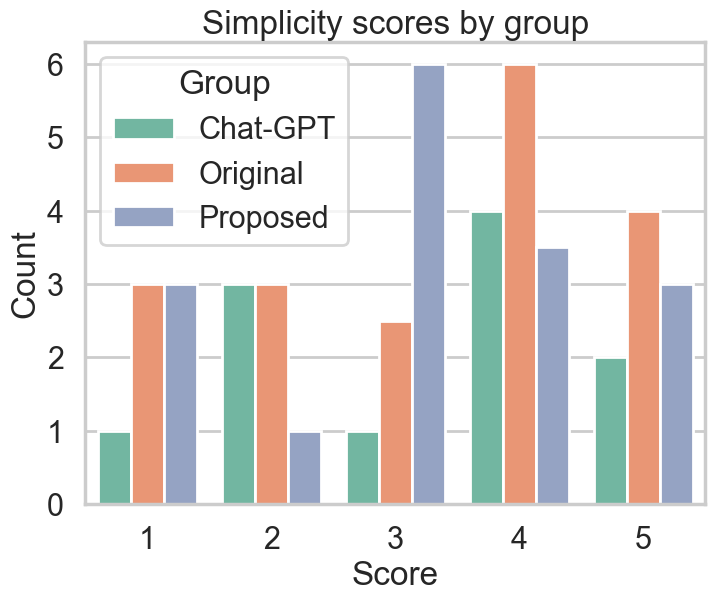

In [142]:
# Count the occurrences of each score for each group
counts = df.groupby(["Q17", "group"]).size().reset_index(name="count")

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=counts, x="Q17", y="count", hue="group", palette="Set2", ci=None)

# Add labels and title
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Simplicity scores by group")
plt.legend(title="Group")
plt.savefig('simplicity_scores.png')
plt.show()

### Comprehension ??

In [143]:
# TODO: Repeat the above for the other questions

### Engagement

option 1 - get results from one question


/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


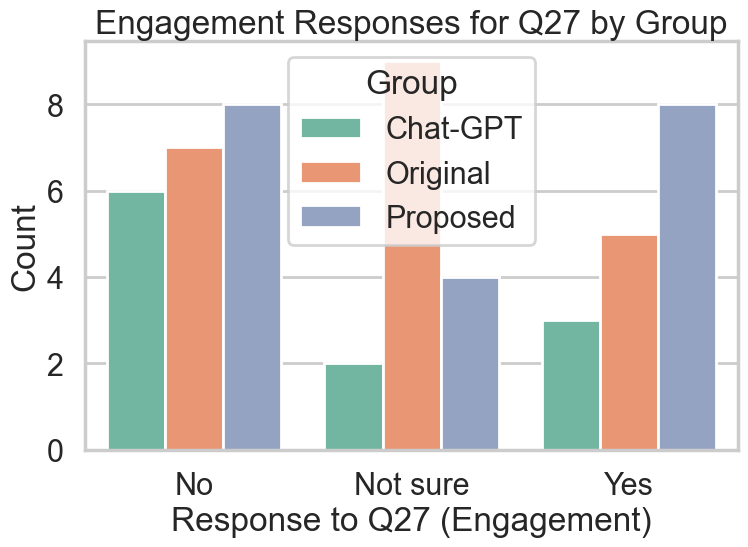

In [144]:
# Count responses for Q27 by group
engagement_counts_q27 = df.groupby(["Q27", "group"]).size().reset_index(name="count")

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=engagement_counts_q27, x="Q27", y="count", hue="group", palette="Set2")

# Customize the plot
plt.xlabel("Response to Q27 (Engagement)")
plt.ylabel("Count")
plt.title("Engagement Responses for Q27 by Group")
plt.legend(title="Group")
plt.tight_layout()

plt.savefig("engagement_responses_q27.png")

# Show the plot
plt.show()

option 2 - get results from 3 question (average)

In [145]:
# Map the responses to numeric values: Yes = 1, No = 0, I'm not sure = 0.5
engagement_map = {
    "Yes": 1,
    "No": 0,
    "I'm not sure": 0.5
}

# Apply the mapping to each question (Q27, Q28, Q29)
df["Q27_numeric"] = df["Q27"].map(engagement_map)
df["Q28_numeric"] = df["Q28"].map(engagement_map)
df["Q29_numeric"] = df["Q29"].map(engagement_map)

# Calculate the average engagement score across the three questions for each row
df["average_engagement"] = df[["Q27_numeric", "Q28_numeric", "Q29_numeric"]].mean(axis=1)

# Calculate the average engagement score per group
average_engagement = df.groupby("group")["average_engagement"].mean().reset_index()


/var/folders/l7/wzp39ssn7gggk5cszv0vycdc0000gn/T/ipykernel_49347/3153280623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_engagement, x="group", y="average_engagement", palette="Set2")
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packa

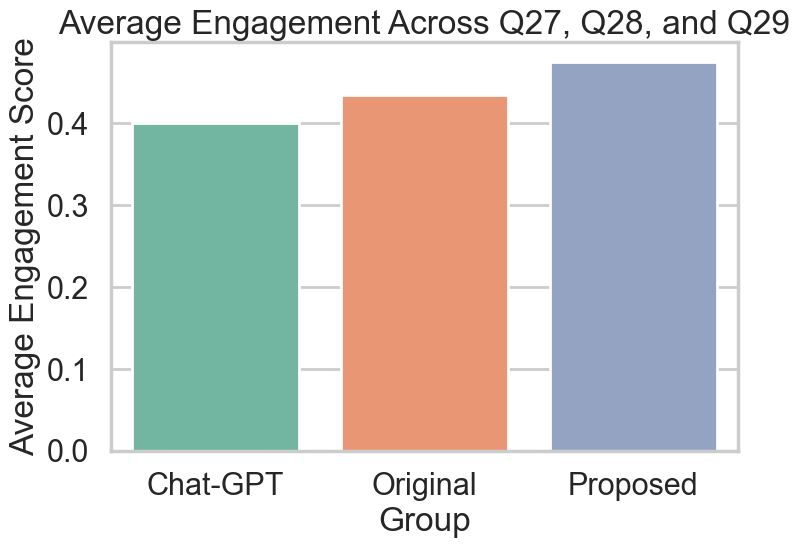

In [146]:
# Plot the average engagement scores for each group
plt.figure(figsize=(8, 6))
sns.barplot(data=average_engagement, x="group", y="average_engagement", palette="Set2")

# Customize the plot
plt.xlabel("Group")
plt.ylabel("Average Engagement Score")
plt.title("Average Engagement Across Q27, Q28, and Q29")
plt.tight_layout()

plt.savefig("average_engagement_scores.png")

# Show the plot
plt.show()

option 3 - get results from 3 questions but show proportions

/var/folders/l7/wzp39ssn7gggk5cszv0vycdc0000gn/T/ipykernel_49347/2920502841.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=engagement_proportions, x="group", y="proportion", hue="Q27", palette="Set2", ci=None)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 li

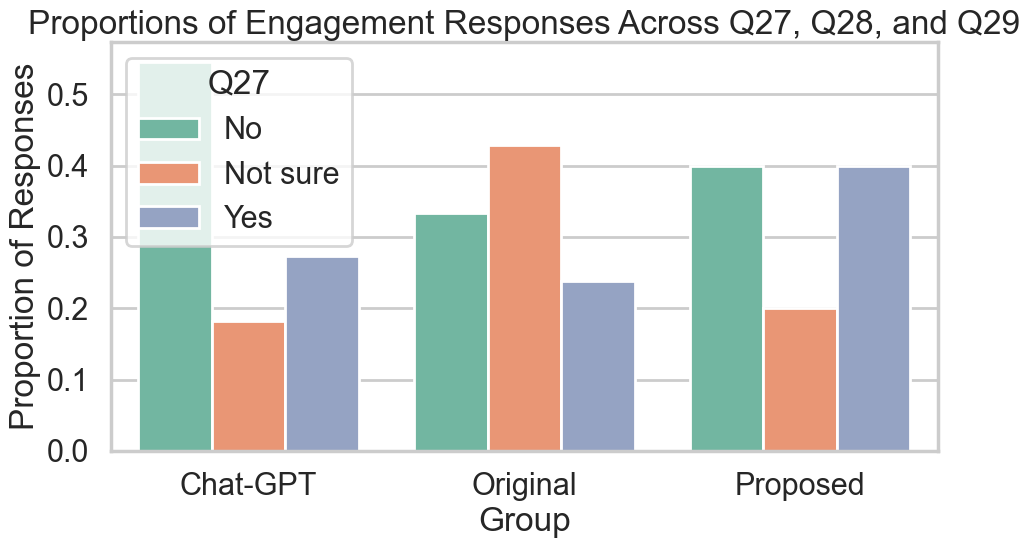

In [147]:
# Calculate the proportion of each response (Yes, No, I'm not sure) for each group across Q27, Q28, Q29
engagement_proportions = pd.DataFrame()

for q in ["Q27", "Q28", "Q29"]:
    # Count the occurrences of each response for the given question
    counts = df.groupby([q, "group"]).size().reset_index(name="count")

    # Calculate the total responses for each group and question
    total_responses = counts.groupby("group")["count"].transform("sum")

    # Calculate the proportion of each response
    counts["proportion"] = counts["count"] / total_responses

    # Add the proportions for each question to the engagement_proportions dataframe
    engagement_proportions = pd.concat([engagement_proportions, counts[["group", q, "proportion"]]], axis=0)

# Plot the proportions of responses (Yes, No, I'm not sure) for each group
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_proportions, x="group", y="proportion", hue="Q27", palette="Set2", ci=None)

# Customize the plot
plt.xlabel("Group")
plt.ylabel("Proportion of Responses")
plt.title("Proportions of Engagement Responses Across Q27, Q28, and Q29")
plt.tight_layout()

plt.savefig("engagement_proportions.png")

# Show the plot
plt.show()


option 4 - as pie chart (MY FAVOURITE)

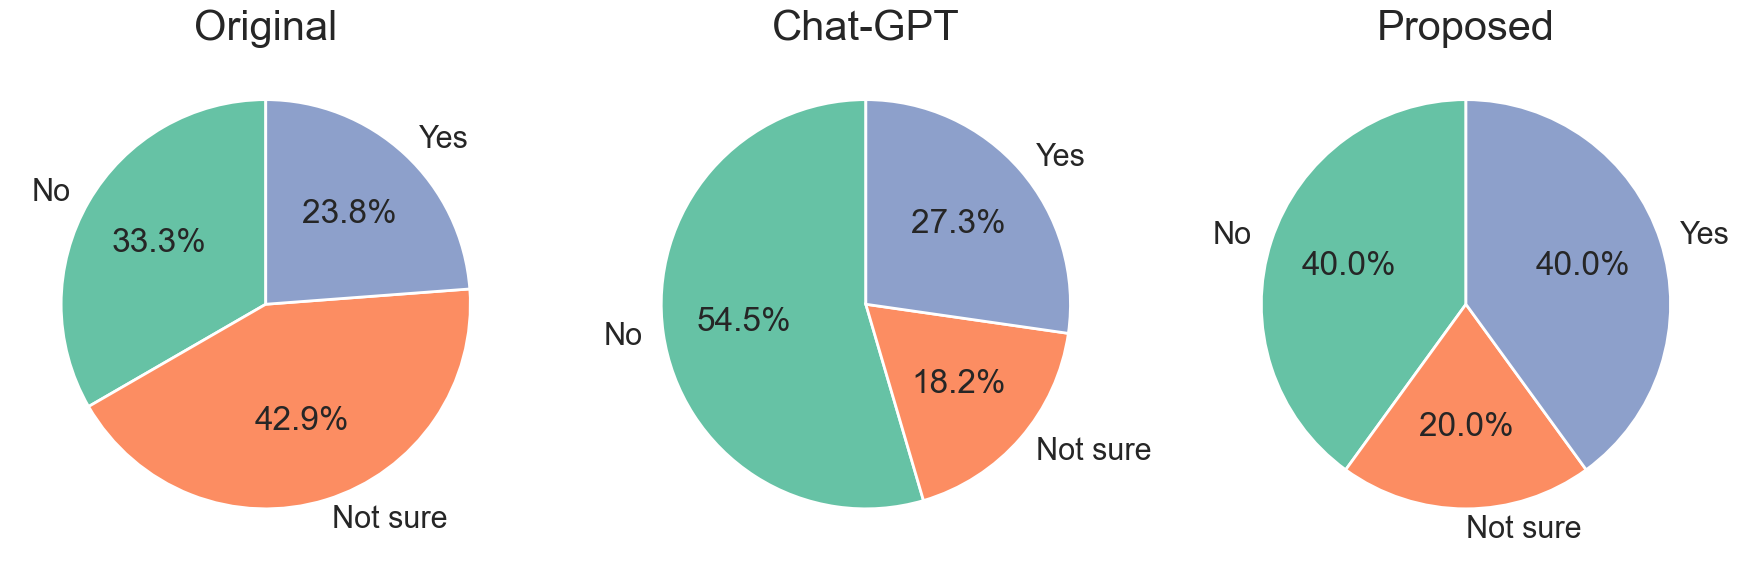

In [148]:
# Prepare the data for pie charts
grouped_data = df.groupby(["group", "Q27"]).size().reset_index(name="count")
total_responses = grouped_data.groupby("group")["count"].transform("sum")
grouped_data["proportion"] = grouped_data["count"] / total_responses

# Define the order of the groups to display (Original first)
group_order = ['Original', 'Chat-GPT', 'Proposed']

# Create subplots to display pie charts horizontally
fig, axes = plt.subplots(1, len(group_order), figsize=(18, 6))

# Plot a pie chart for each group on a different subplot
for i, group in enumerate(group_order):
    group_data = grouped_data[grouped_data["group"] == group]

    # Use Seaborn's color palette for the pie chart
    palette = sns.color_palette("Set2", len(group_data))

    # Plot pie chart on the ith subplot using Matplotlib's pie function
    wedges, texts, autotexts = axes[i].pie(group_data["proportion"],
                                           labels=group_data["Q27"],
                                           autopct='%1.1f%%',
                                           colors=palette,
                                           startangle=90)

    # Title and style adjustments for the pie chart
    axes[i].set_title(group, fontsize=30)

    # # Adjust text properties for better readability
    # for text in autotexts + texts:
    #     text.set(fontsize=12, fontweight='bold')

# Tight layout for the subplots
plt.tight_layout()

# Save the plot and display it
plt.savefig("engagement_responses_pie_charts_seaborn.png")
plt.show()


### Cognitive effort

/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


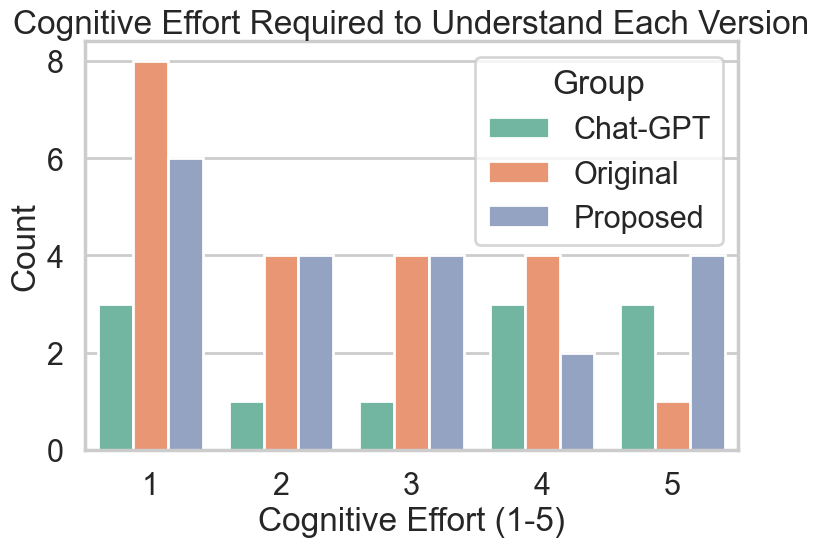

In [149]:
# Grouping by Cognitive Effort (Q30) and group
effort_counts = df.groupby(["Q30", "group"]).size().reset_index(name="count")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=effort_counts, x="Q30", y="count", hue="group", palette="Set2")

# Customize the plot
plt.xlabel("Cognitive Effort (1-5)")
plt.ylabel("Count")
plt.title("Cognitive Effort Required to Understand Each Version")
plt.legend(title="Group")
plt.tight_layout()

plt.savefig("cognitive_effort.png")

# Show the plot
plt.show()
